In [2]:
pwd

'C:\\Users\\Acer'

In [3]:
! pip install xgboost

In [4]:
! pip install dtreeviz

In [5]:
from dtreeviz.trees import dtreeviz

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import fbeta_score
from numpy import loadtxt
from xgboost import XGBClassifier



In [7]:
telco_base_data = pd.read_csv('D:/Customer_churn_analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
telco_base_data.shape

(7043, 21)

In [10]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

describe is used for numerical data

In [11]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.02, 'Count of target variable')

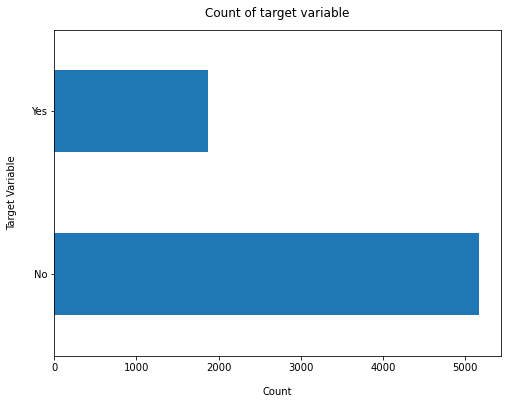

In [13]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize =(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of target variable",y=1.02)


In [14]:
telco_base_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])
# Basically value counts is used to return unique values. So there are only 2 unique values in our dataset that is Yes or No

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

imbalanced dataset

In [16]:
telco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
telco_data =telco_base_data.copy()

In [18]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
telco_data.loc[telco_data ['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


since the nuber 11 is quite negligible as compared to 7413 we can ignore them 

In [20]:
telco_data.dropna(how = 'any', inplace = True)
# telco_data.fillna(0)

In [21]:
#creating Bins 

In [22]:
print(telco_data['tenure'].max())

72


In [23]:
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
telco_data['tenure_group']= pd.cut(telco_data.tenure, range(1,80,12), right=False, labels=labels)


In [24]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [25]:
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


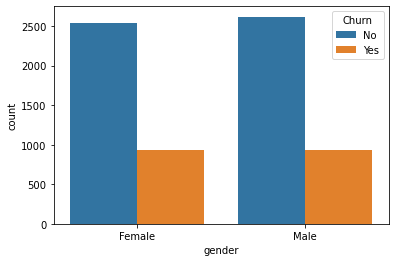

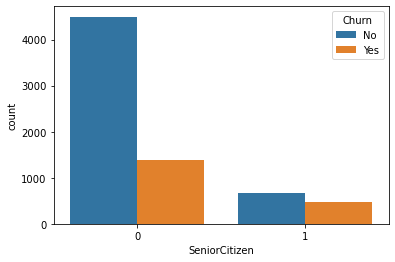

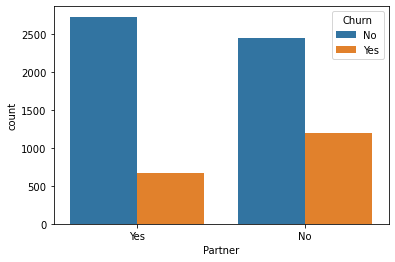

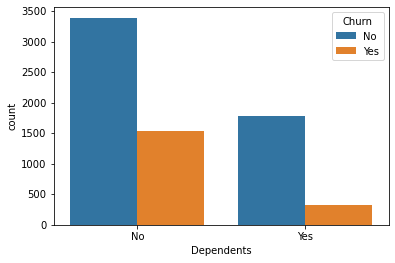

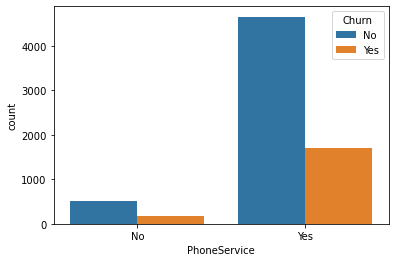

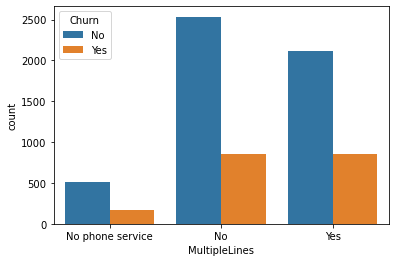

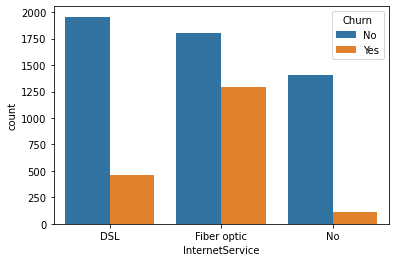

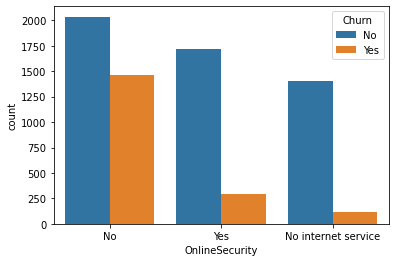

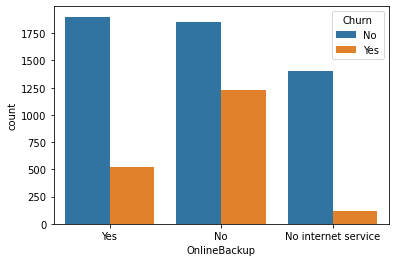

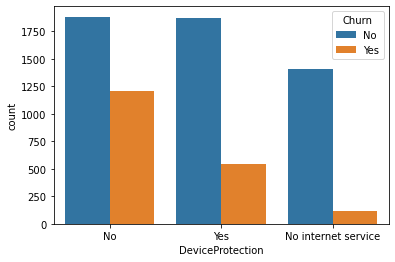

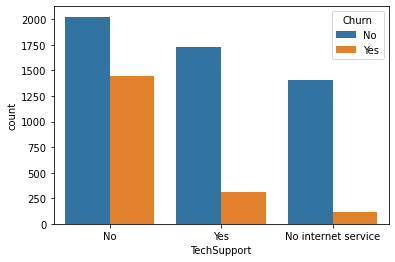

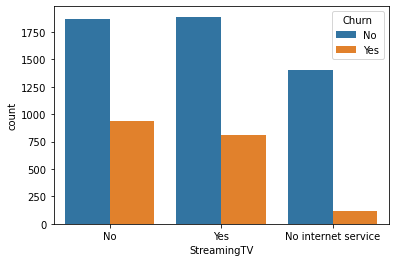

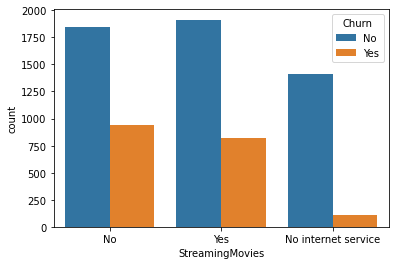

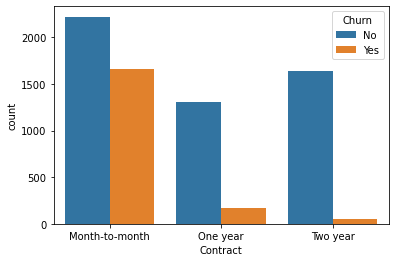

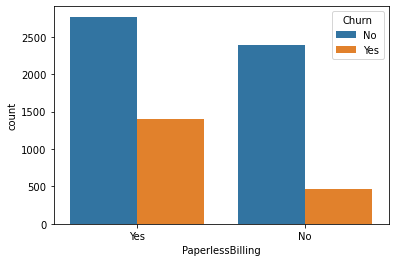

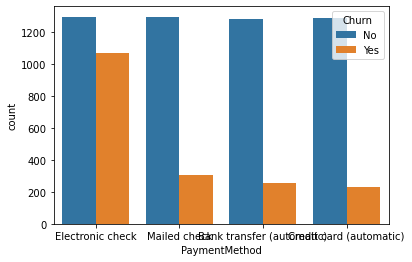

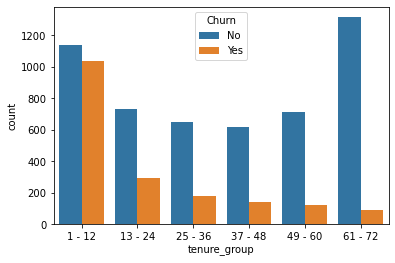

In [26]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

convert The variable Churn in a binary numeric Value: Yes=1, No=0

In [27]:
telco_data['Churn']= np.where(telco_data.Churn== 'Yes',1,0)

In [28]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


convert all the categorical vaiables into numerical/dummy variables

In [29]:
#one hot Encoding

In [30]:
#dummy Trap can be used

In [31]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


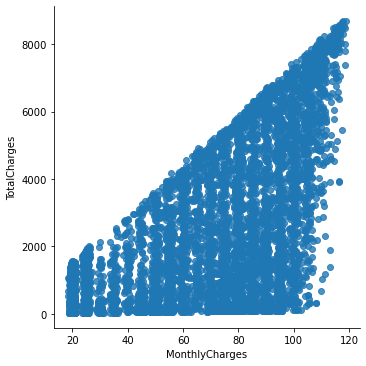

In [32]:
sns.lmplot(data=telco_data_dummies, x= 'MonthlyCharges', y='TotalCharges', fit_reg=False)

Text(0.5, 1.0, 'Monthly charges by churn')

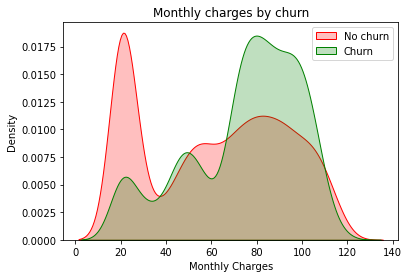

In [33]:
math = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"]==0)],
                  color="Red", shade = True)
math = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"]==1)],
                  ax=math,color="Green", shade = True)
math.legend(["No churn","Churn"], loc='upper right')
math.set_ylabel('Density')
math.set_xlabel('Monthly Charges')
math.set_title('Monthly charges by churn')


In [34]:
# key Insight found As higher the monthly charge, lower the tenure, Lower the Total charge----------> Higher churn rate

Text(0.5, 1.0, 'Total charges by churn')

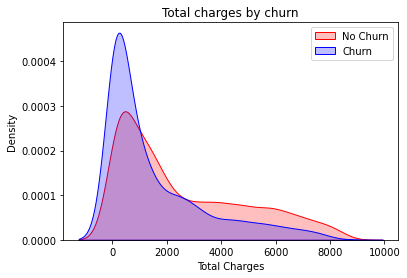

In [35]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

In [ ]:
# So from here we can Infer that that There is more churning when the total Charges are low. This is also a semantic
# understanding because that is quite obvious that if you have not paid a hefty amount to some organization you can always
# switch. 

<AxesSubplot:>

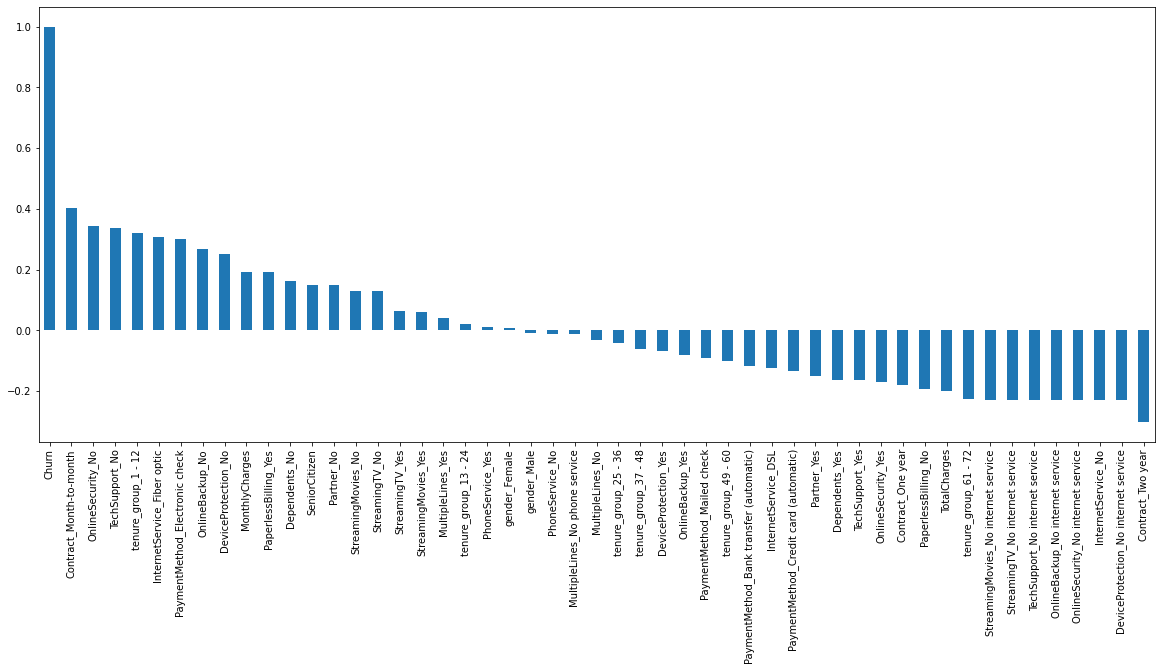

In [36]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

In [37]:
# key Insights:-
# High Churn Rate seen in Contract_Month_to_month, No online Security , No Tech Support, First year subs...., fibre optic
# Low Churn Rate seen in Long term Contracts, Subscriptions without net, Customer Enged for 5+ years
# Gender, Availablity of phone Service,-----> no impact on churn

<AxesSubplot:>

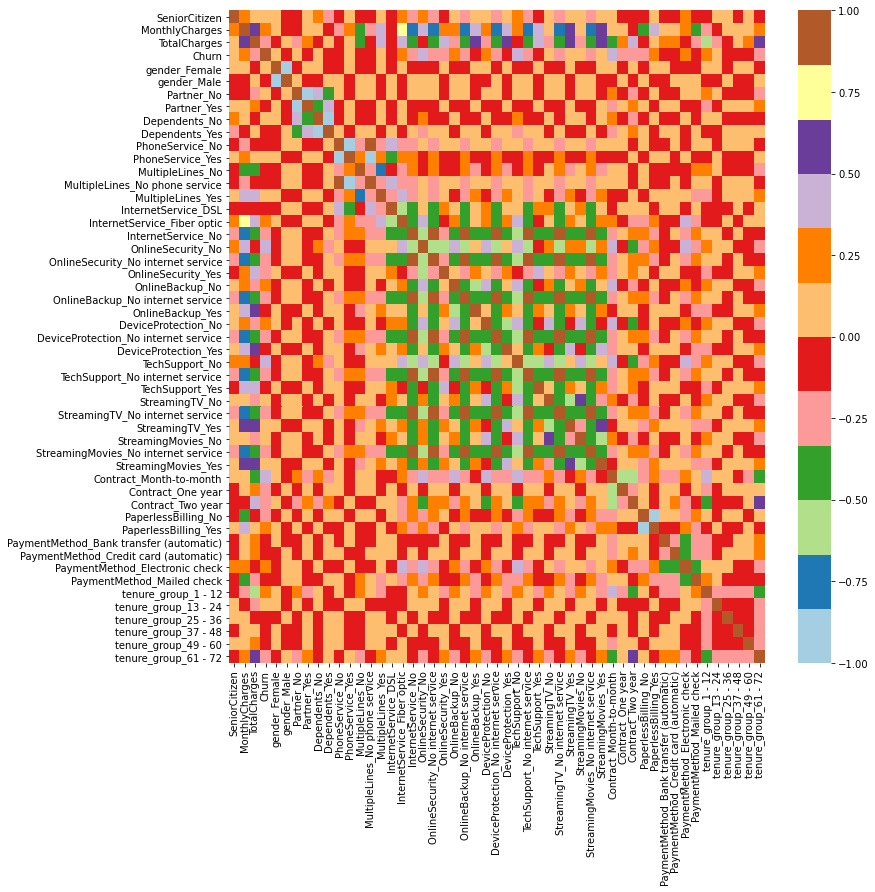

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

In [39]:
new_df1_target0 = telco_data.loc[telco_data["Churn"]==0]
new_df1_target1 = telco_data.loc[telco_data["Churn"]==1]

In [40]:
def uniplot(df,col,title,hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"]= 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad']= 30
    
    temp =  pd.Series(data=hue)
    fig,ax= plt.subplots()
    width = len(df[col].unique()) +7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order= df[col].value_counts().index,hue = hue, palette='bright')
    plt.show()

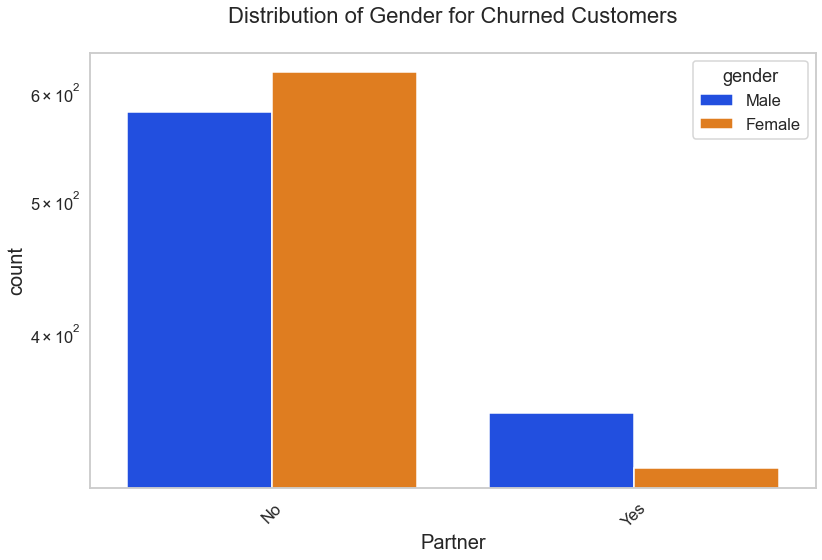

In [41]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers', hue='gender')

In [42]:
# So from here we can see that if there is no partner and and if the selected candidate is female then the count is higher than
# the Inverse. 

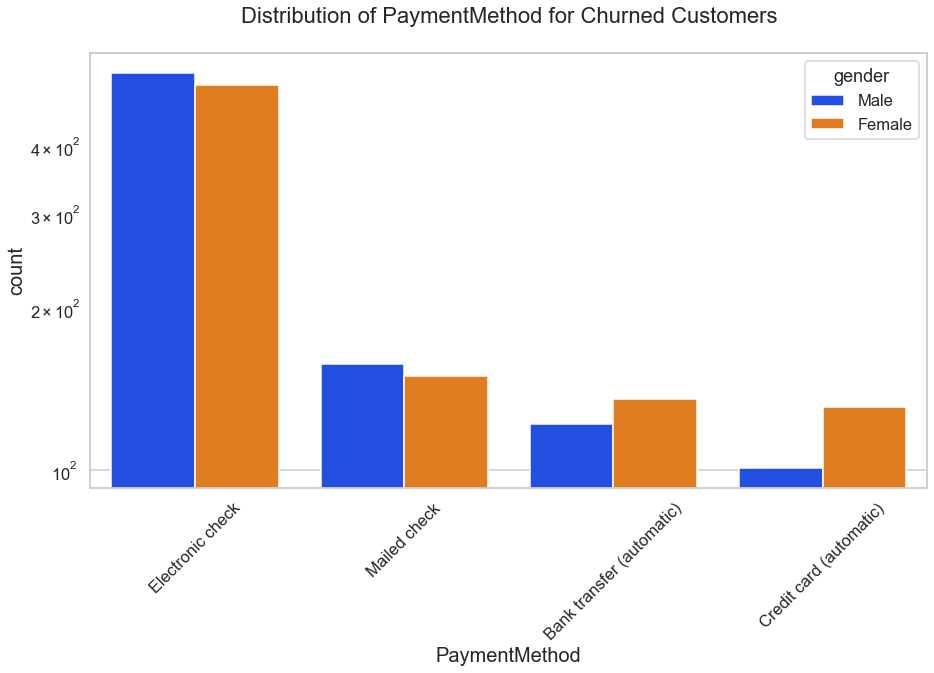

In [43]:
uniplot(new_df1_target1,col='PaymentMethod',title= 'Distribution of PaymentMethod for Churned Customers', hue='gender')

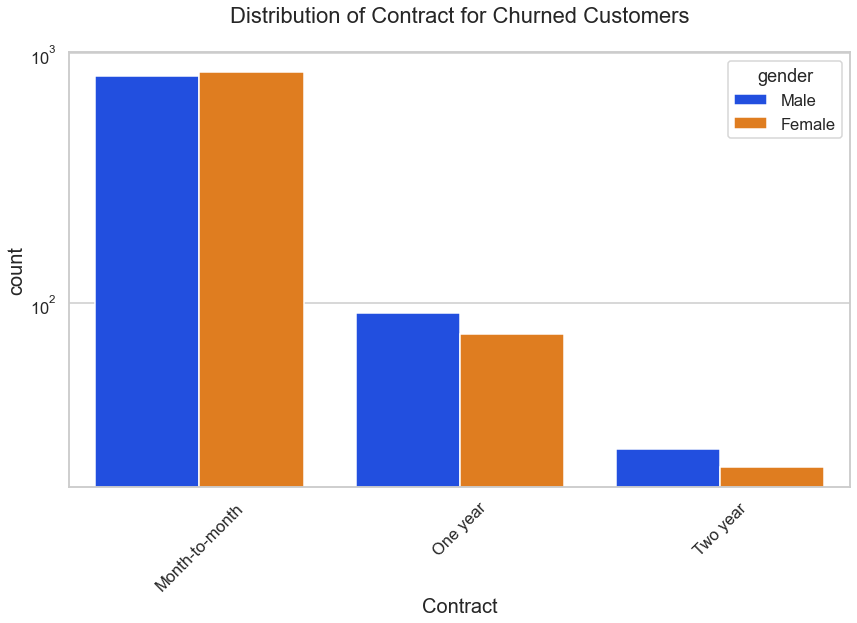

In [44]:
uniplot(new_df1_target1,col='Contract',title= 'Distribution of Contract for Churned Customers', hue='gender')

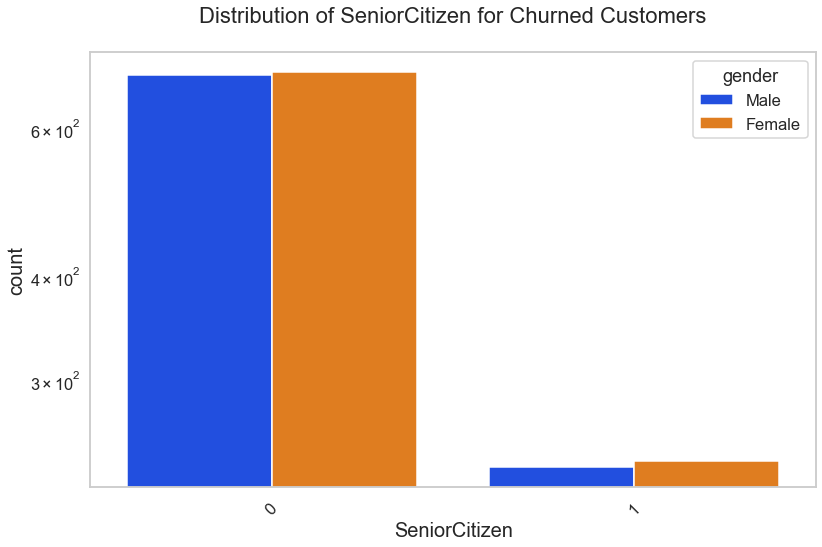

In [45]:
uniplot(new_df1_target1,col='SeniorCitizen',title= 'Distribution of SeniorCitizen for Churned Customers', hue='gender')

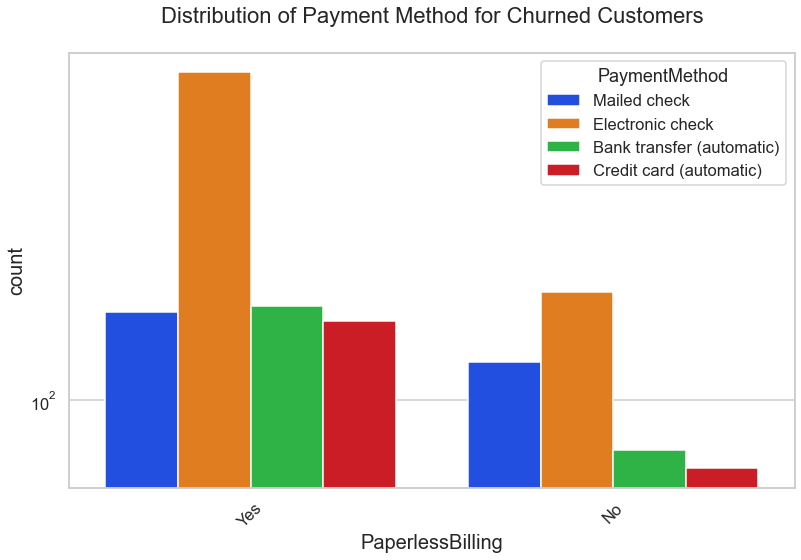

In [46]:
uniplot(new_df1_target1,col='PaperlessBilling',title= 'Distribution of Payment Method for Churned Customers', hue='PaymentMethod')

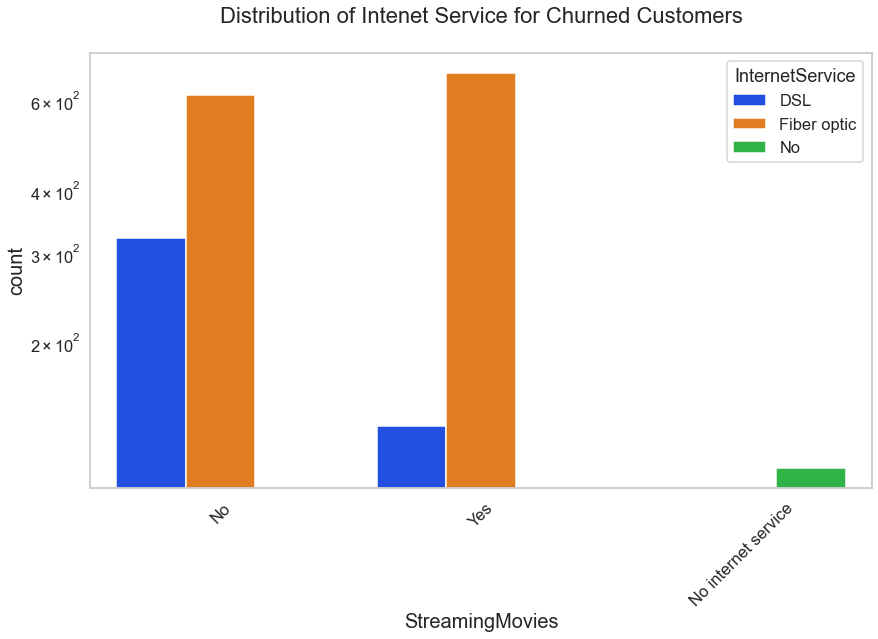

In [47]:
uniplot(new_df1_target1,col='StreamingMovies',title= 'Distribution of Intenet Service for Churned Customers', hue='InternetService')

In [48]:
# Basic Conclusions from Uniariate and Bivariate analysis 
# 1.) Montly Contract People Are most likely to Churn at higher rate 
# 2.) Electronic Check Payment are the People having Higher Churning rate 
# 3.) Non- Senior Citizen Citizen are High Churners 
# 4.) No Online Security , No Tech Support category are higher Churners

In [49]:
telco_data_dummies.to_csv('tel_churn.csv')

In [50]:
df = pd.read_csv('tel_churn.csv')

In [51]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [52]:
df = df.drop('Unnamed: 0', axis=1)

In [53]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [54]:
# now create variables x and y where x is independent variables and y is dependent variables(churn)


In [55]:
x= df.drop('Churn', axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [56]:
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [57]:
# Evaluation Metrics to be considered

In [58]:
# Before Moving on to the model processing we must be sure that on what basis are we going to evaluate the model
# If we observe our output column is Churn that is a categorical column so we sevral choices such as Accuracy , Precision,
# Recall , F-1/F-2/F-0.5 scores.

In [59]:
# Lets try to undertand by considering the first evalution metric that is accuracy.
# Accuracy will not be a good evaluation metric the reason being the Imbalanced dataset. If our dataset is imbalanced then our
# model will be more biased towards the majority class that is not churning and it is highly possible that it may neglect the
# minority class. Due to which even though we will have high accuracy but that would not add value to the business or that
# won't be a deciding parameter.


In [60]:
# Let us try with the second Evaluation metric that is Precision.
# Precision means out of all the predicted positive values how many of them are actually positive.
# So if we try to observe the Formula of Precision :- T.P/T.P+F.P 
# So we are concerned more with the term False positive :- Here False positive means we predicted that the customer is churning
# but actually he is not. So if we consider this from a business point of view then there is no business loss to company even
# though our model is bit inaccurate.
# so we will not consider Precision in this case.

In [61]:
# Let us try with the recall :
# Recall means out of actual positive values how many of them are correctly classified.
# So if we look at the formula of Recall:- T.P/T.P+ F.N
# Here we are concerned more with the false negative term :- False negative means we predicted that the customer is not churning
# but actually he is churning. So this could be a major Setback for the organization because our model is predicing him as a 
# loyal customer where as he is a churner.
# So this is a potential parameter that could be considered as evaluation metric 

In [62]:
# Now we know that Recall could be a Important evaluation metric and in our scenario its more Important than Precision.
# So we are not neglecting the F- score because the number of False positive is not that high.
# So if we are considering the F-score as F.N>F.P(Weightage) So we will be considering F-2,F-3 scores to maintian the optimum
# balance.

In [63]:
# Normal train test Split (70-30)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [ ]:
# So as we see that recall score is quite less (less than 50%) so the amount of False negative is quite high due to which our
# our models recall score is less. Due to which it becomes quite Important to emphasize on the recall score as it could lead 
# business perspective of an organization in a wrong direction. 

In [105]:
# Decision Tree Classifier

In [106]:
model_dt = DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=6, min_samples_leaf=8)

In [107]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [108]:
y_pred = model_dt.predict(x_test)

In [109]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
model_dt.score(x_test,y_test)

0.7895734597156399

In [111]:
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1557
           1       0.63      0.49      0.55       553

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [115]:
confusion=confusion_matrix(y_test, y_pred)
print(confusion)

[[1395  162]
 [ 282  271]]


In [117]:
recall = confusion[0][0] /(confusion[0][0] + confusion[1][0])
print(recall)

0.8318425760286225


In [ ]:
# So we obtained the Recall for the Decision Tree Model

In [ ]:
# Recall value should Ideally be high because it tells that the there are less false negative and more true positive.

In [ ]:
# 80% recall means that our model has correctly classified 80% of actual positve data. To optimize it further we can try with
# Differnt models and then can test the result.

In [118]:
#RANDOM FOREST CLASSIFIER

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
model_rf = RandomForestClassifier(criterion='gini',random_state=100,max_depth=5, min_samples_leaf=6)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)


In [121]:
model_rf.score(x_test,y_test)

0.7862559241706161

In [122]:
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1557
           1       0.63      0.49      0.55       553

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [124]:
conf_rf= confusion_matrix(y_test, y_pred_rf)
print(conf_rf)

[[1472   85]
 [ 366  187]]


In [126]:
recall = conf_rf[0][0] /(conf_rf[0][0] + conf_rf[1][0])
print(recall)

0.8008705114254625


In [127]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [128]:
params = {
    'max_depth': [2,3,5,6,7,15,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [131]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 252 candidates, totalling 1008 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 6, 7, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='recall', verbose=1)

In [132]:
grid_search.best_score_

0.49316109422492405

In [133]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=15, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [134]:
# So we have obtained some of the random forest parameters that will be ideal fit according to grid search CV.
# Lets try with that and see if any change is possible.

In [138]:
model_rf_1 = RandomForestClassifier(criterion='entropy',random_state=42,max_depth=15, min_samples_leaf=10, n_estimators=10)
model_rf_1.fit(x_train, y_train)
y_pred_rf_1 = model_rf_1.predict(x_test)

In [139]:
conf_rf_1= confusion_matrix(y_test, y_pred_rf_1)
print(conf_rf_1)

[[1420  137]
 [ 294  259]]


In [140]:
recall = conf_rf_1[0][0] /(conf_rf_1[0][0] + conf_rf_1[1][0])
print(recall)

0.8284714119019837


In [ ]:
# so we can see by Hyperparameter tunning(Grid_Search_CV) my Recall score Increased.

In [ ]:
# Trying with XG boost Classifier

In [141]:
model = XGBClassifier()

In [142]:
model.fit(x_train, y_train)

D:\PYTHON\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [145]:
y_pred = model.predict(x_test)

In [146]:
conf_XGB = confusion_matrix(y_test, y_pred)

In [147]:
print(conf_XGB)

[[1405  152]
 [ 283  270]]


In [148]:
recall = conf_XGB[0][0] /(conf_XGB[0][0] + conf_XGB[1][0])
print(recall)

0.832345971563981


In [ ]:
# So we can observe that by using XG boost classifier we are getting quite decent Recall.

In [149]:
# So similarly we can try differnt models and try to understand which model can be a perfect fit for our problem statement.

In [ ]:
# ------------------------------------------------------------------------------------------------------------------------------